In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict



In [ ]:
df = pd.read_csv("/content/storedata.csv")
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vit�ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Mat�as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad


# **EDA**

In [ ]:
#checking for duplicates

duplicate_rows = df[df.duplicated()]
duplicate_rows

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance


In [ ]:
#checking for missing values or null values

df.isnull().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [ ]:
df.describe()

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
count,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,136.000000,136.000000,136.000000,136.000000
mean,52172.580882,13.352941,15024.095588,112.044118,14.463235,1.487374e+06,1.249870e+06,1.134533e+06,1.066118e+06,6.529412,262.426471,14.463235,14.808824
std,28725.990237,56.592439,2761.801921,6.884085,2.874944,2.804989e+05,2.160875e+05,1.490280e+05,8.884585e+04,2.815147,51.724288,2.895483,2.955258
min,1437.000000,-2.000000,10072.000000,100.000000,10.000000,1.030405e+06,1.000653e+06,1.000214e+06,1.000002e+06,2.000000,200.000000,10.000000,10.000000
25%,24707.250000,6.000000,12793.000000,106.750000,12.000000,1.254949e+06,1.057284e+06,1.012573e+06,1.005593e+06,4.000000,220.750000,12.000000,13.000000
50%,56011.500000,7.000000,14596.500000,111.000000,14.500000,1.516338e+06,1.214459e+06,1.077542e+06,1.033228e+06,6.000000,249.000000,15.000000,15.000000
75%,76870.500000,8.000000,17543.750000,118.000000,17.000000,1.696352e+06,1.396967e+06,1.203077e+06,1.090349e+06,9.000000,292.250000,17.000000,18.000000
max,99854.000000,600.000000,19869.000000,124.000000,19.000000,1.997044e+06,1.929089e+06,1.723395e+06,1.426533e+06,11.000000,408.000000,19.000000,19.000000


In [ ]:
#Applying Hypothesis testing to check if there's any diiference b/w Competition number and competition score

from scipy import stats

t_statistic, p_value = stats.ttest_ind(df['Competition number'], df['Competition score'])


print("Independent t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.")

Independent t-test results:
T-statistic: -0.9741140887468758
P-value: 0.3308718001199975
Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.


In [ ]:
#removing irrelavent feature

df.drop(['Town','Country','Manager name','Competition number'],axis=1,inplace=True)
df.head()

,Store ID,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition score,Performance
0,1437,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,Good
1,1544,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,19,Good
2,2039,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,18,Bad
3,2055,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,12,Bad
4,2141,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,13,Bad


In [ ]:
df.set_index('Store ID', inplace=True)

# **Checking for data imbalance**

In [ ]:
df['Performance'].value_counts()

Performance
Good    69
Bad     67
Name: count, dtype: int64

In [ ]:
df['Car park'].value_counts()

Car park
Yes    94
No     35
Y       4
N       3
Name: count, dtype: int64

# **Encoding the categorical variables**

In [ ]:
df['Car park'].unique()

array(['Yes', 'No', 'Y', 'N'], dtype=object)

In [ ]:
mapping = {'Y': 'Yes', 'N': 'No'}

# Replace values in the 'car park' column
df['Car park'] = df['Car park'].replace(mapping)

In [ ]:
df['Car park'].value_counts()

Car park
Yes    98
No     38
Name: count, dtype: int64

In [ ]:
# from sklearn.utils import resample
# majority_class = df[df['Car park'] == 'Yes']
# minority_class = df[df['Car park'] == 'No']

# majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=334)

# # Combine downsampled majority class with minority class
# df = pd.concat([majority_downsampled, minority_class])

# print(df['Car park'].value_counts())

In [ ]:
df['Car park']

Store ID
1437     Yes
1544     Yes
2039      No
2055      No
2141      No
        ... 
96853    Yes
96858     No
98062     No
98923     No
99854    Yes
Name: Car park, Length: 136, dtype: object

In [ ]:
le_car = LabelEncoder()
df['Car park'] = le_car.fit_transform(df['Car park'])
df['Car park']


Store ID
1437     1
1544     1
2039     0
2055     0
2141     0
        ..
96853    1
96858    0
98062    0
98923    0
99854    1
Name: Car park, Length: 136, dtype: int64

In [ ]:
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])
df['Location'].unique()

array([1, 2, 0, 3])

In [ ]:
le_performance = LabelEncoder()
df['Performance'] = le_performance.fit_transform(df['Performance'])
df['Performance'].unique()

array([1, 0])

# **Checking for outliers**


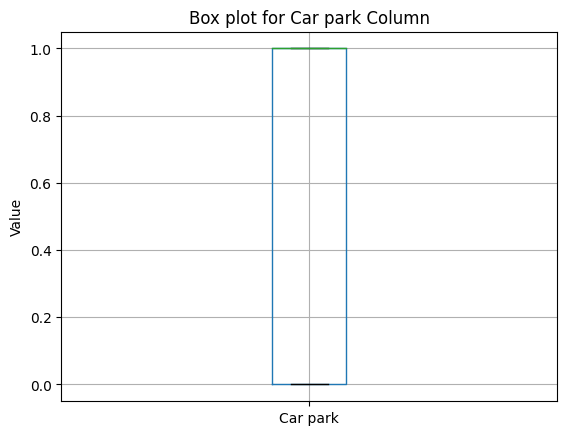

In [ ]:
df.boxplot(column='Car park')

plt.title('Box plot for Car park Column')
plt.ylabel('Value')


plt.show()

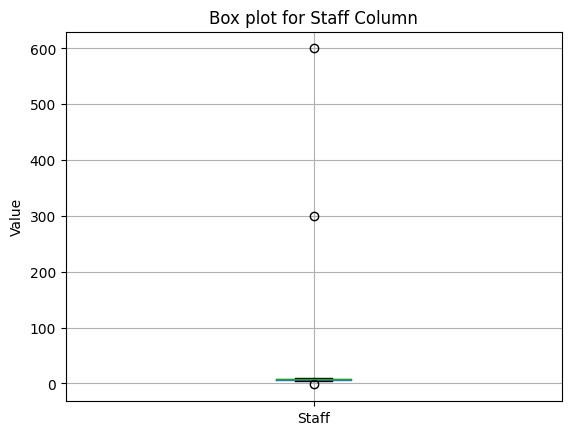

In [ ]:
df.boxplot(column='Staff')

plt.title('Box plot for Staff Column')
plt.ylabel('Value')


plt.show()

In [ ]:
for staff in df['Staff']:
  if staff > 10 or staff < 0:
    df['Staff'].replace(staff, np.median(df['Staff']), inplace=True)

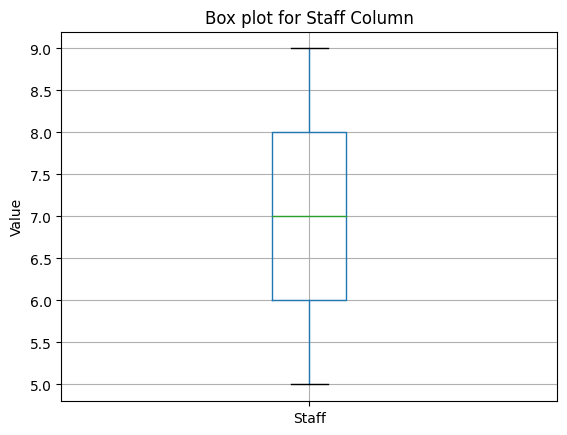

In [ ]:
df.boxplot(column='Staff')

plt.title('Box plot for Staff Column')
plt.ylabel('Value')


plt.show()

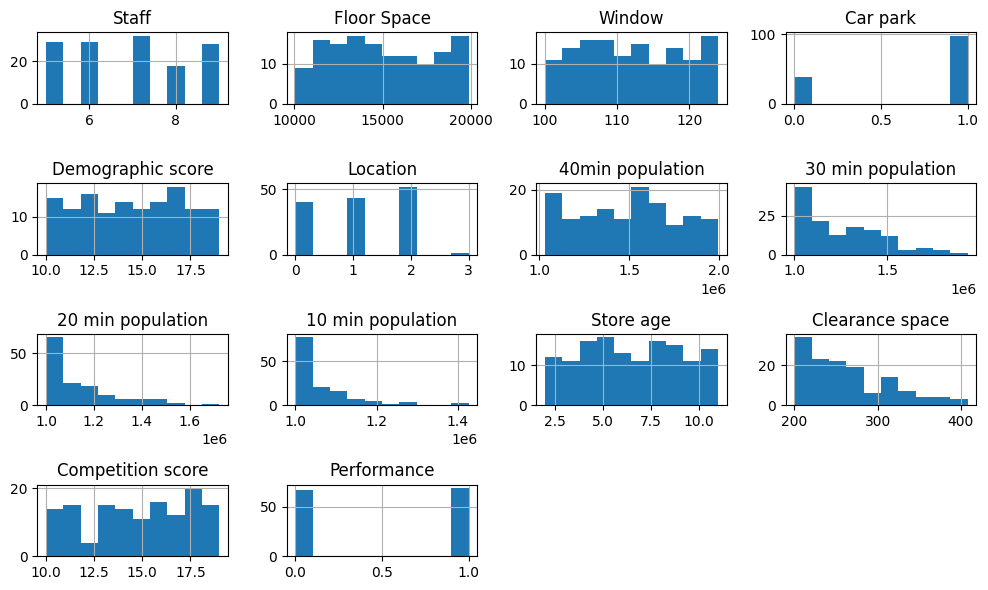

In [ ]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

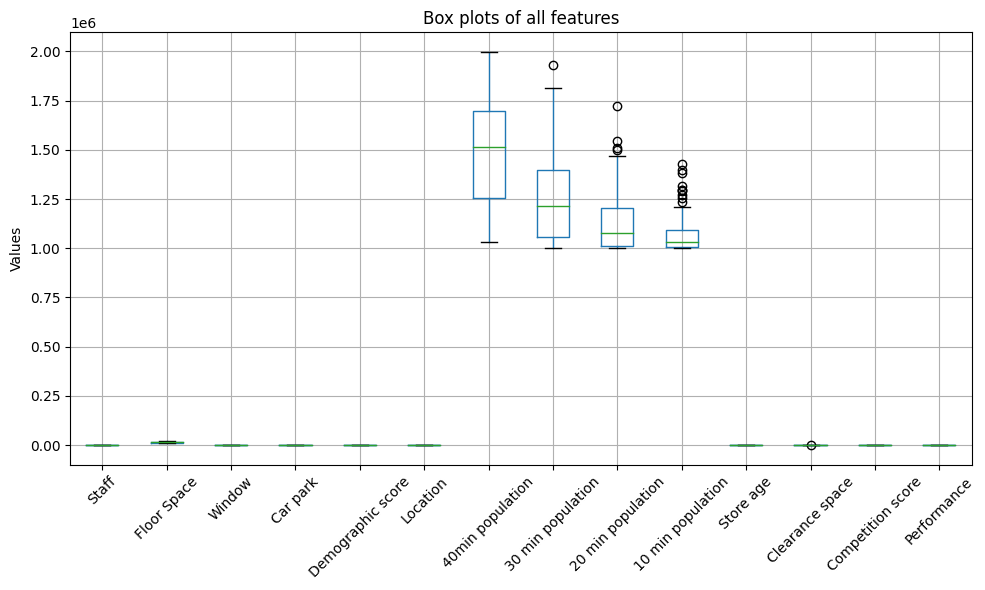

In [ ]:
plt.figure(figsize=(10, 6))  # Set figure size
df.boxplot()
plt.title('Box plots of all features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


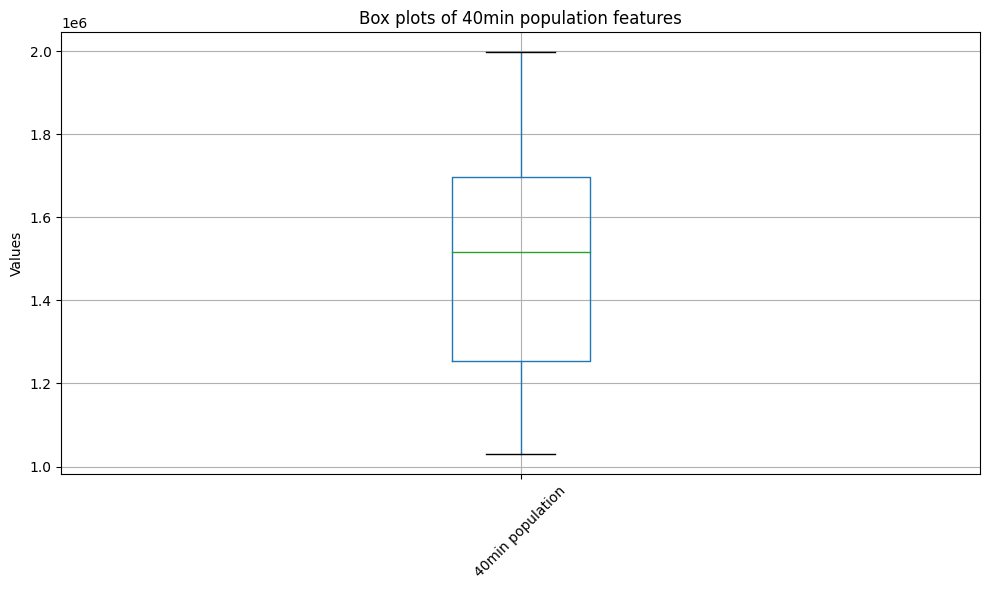

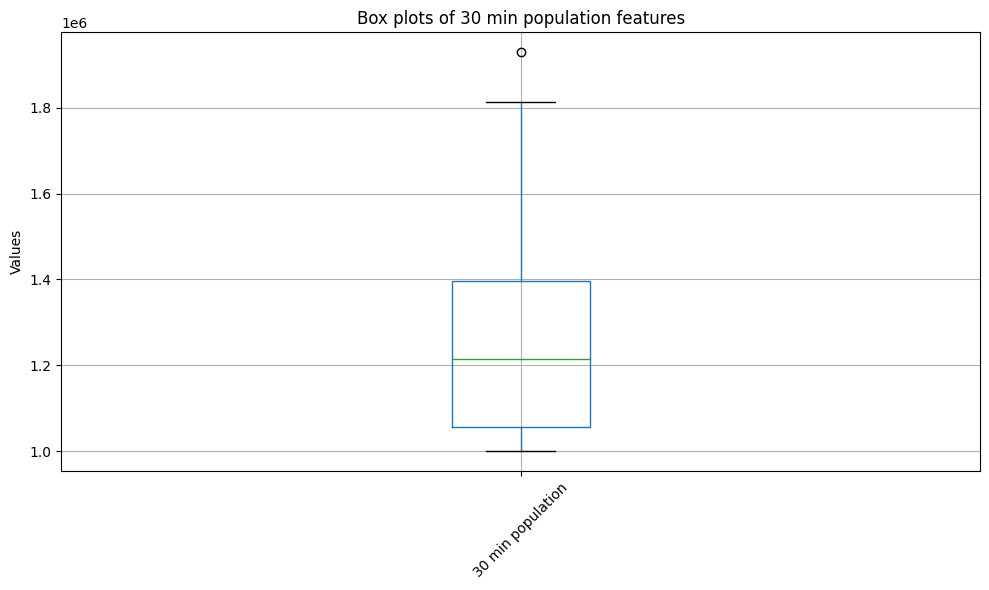

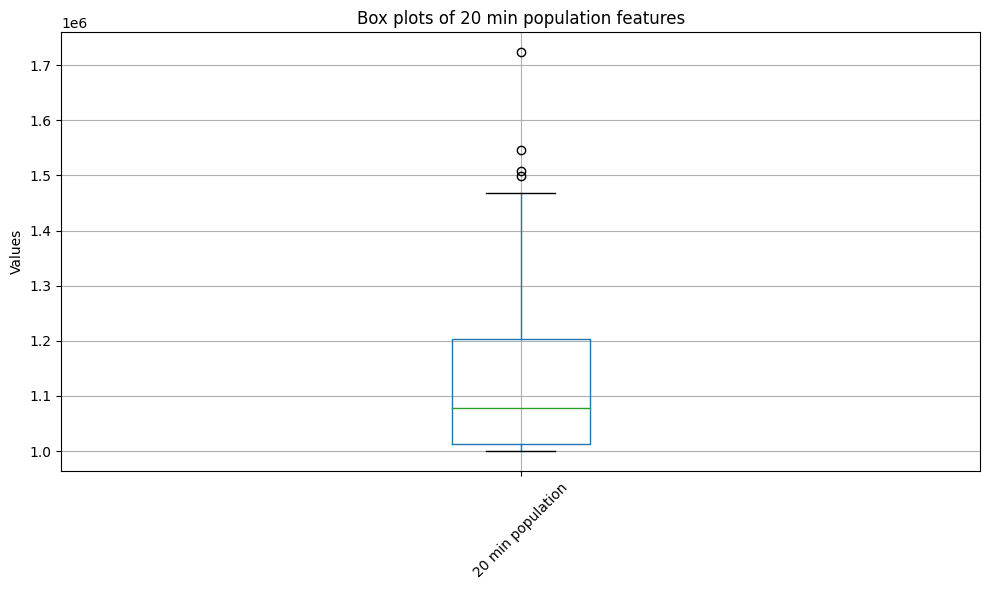

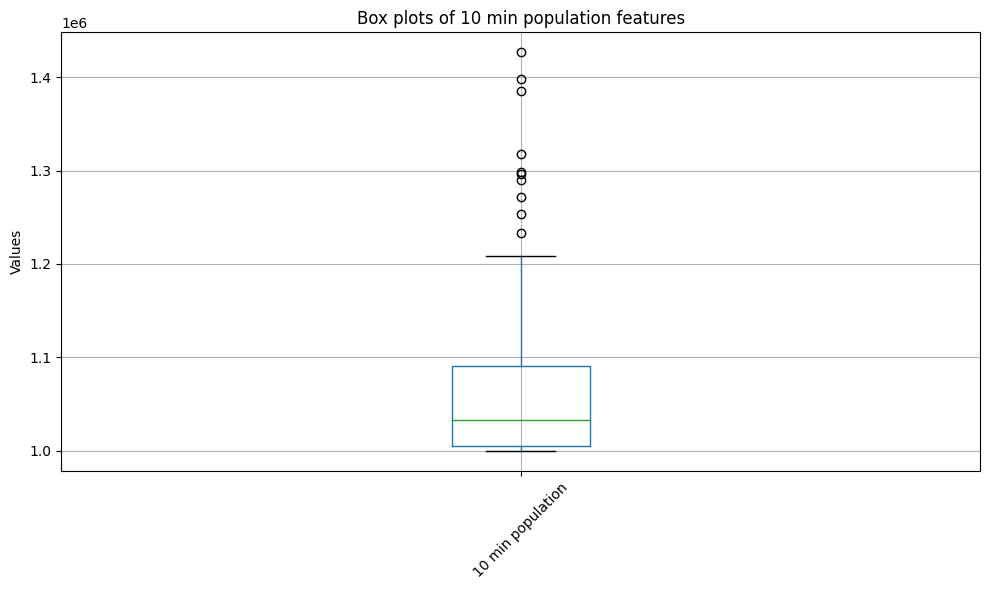

In [ ]:
pop_cols = ['40min population',	'30 min population',	'20 min population',	'10 min population']

for cols in pop_cols:
  plt.figure(figsize=(10, 6))
  df.boxplot(column = cols)
  plt.title(f'Box plots of {cols} features')
  plt.ylabel('Values')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


In [ ]:
for col in pop_cols:
  Q1 = df[col].quantile(0.25)

  #calculate the third quartile (Q3)
  Q3 = df[col].quantile(0.75)

  #calculate the interquartile range (IQR)
  IQR = Q3 - Q1

  #define the lower and upper bounds for outlier detection
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR


  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


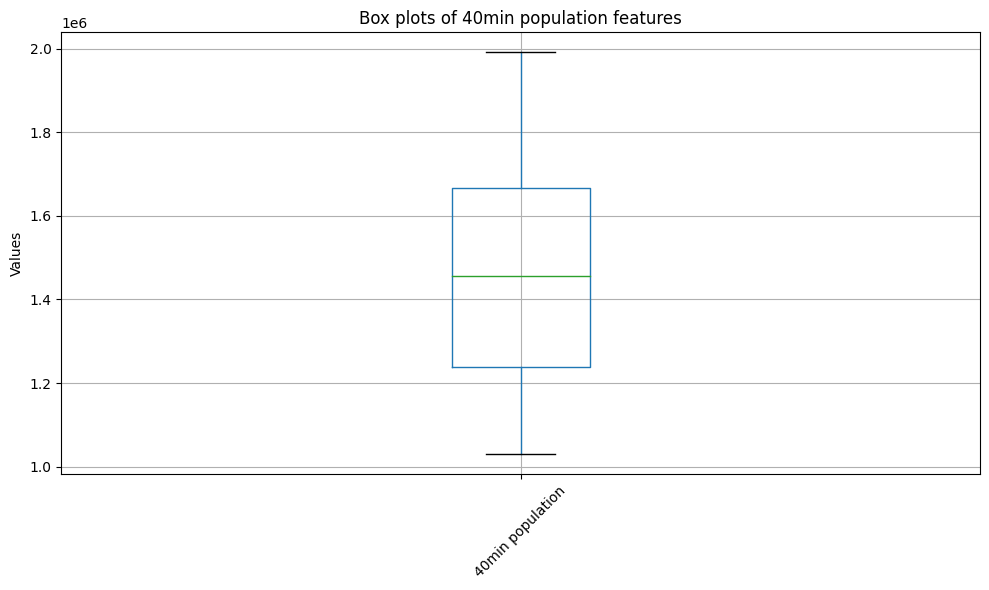

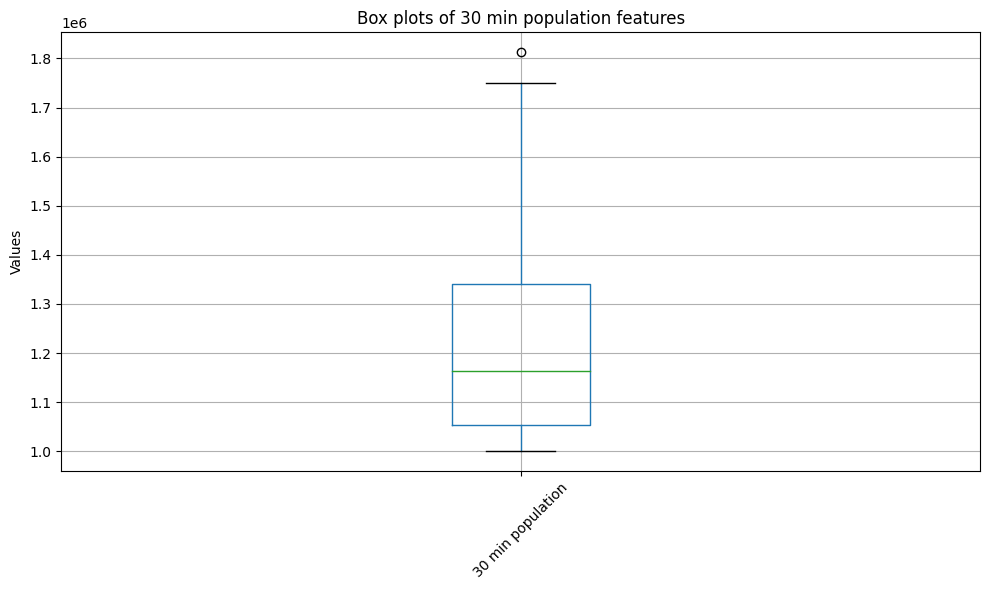

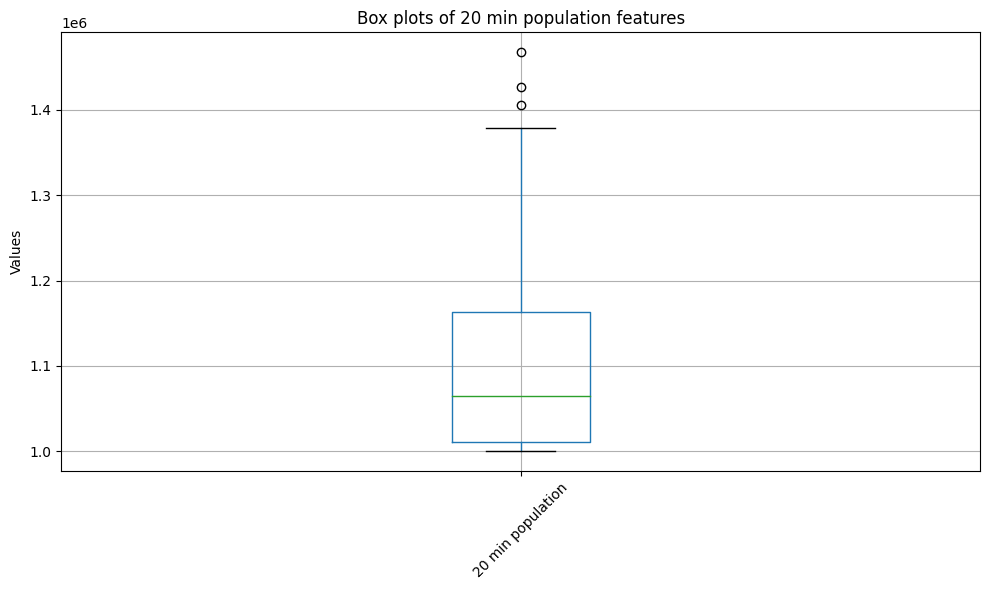

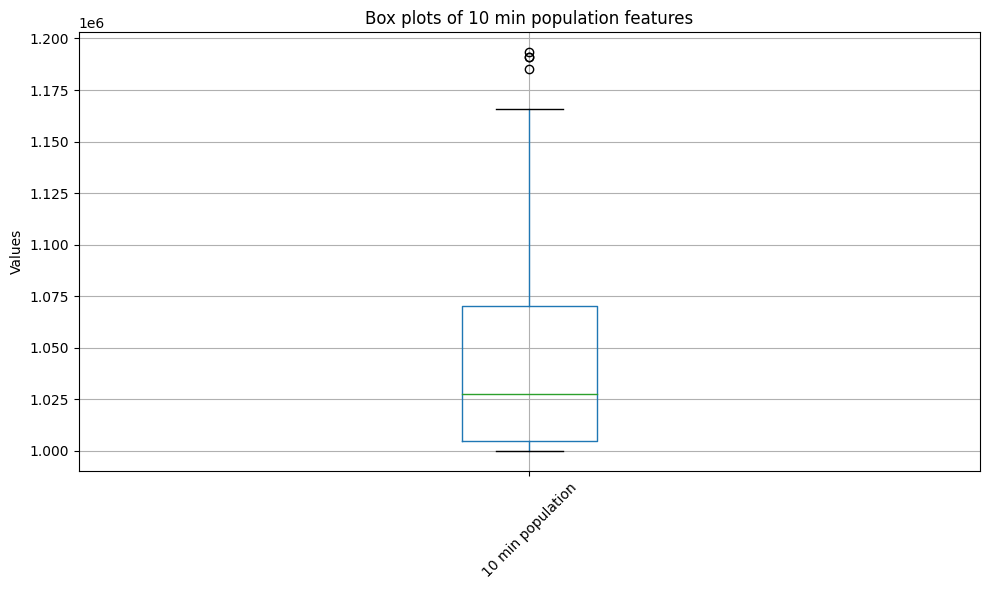

In [ ]:

for cols in pop_cols:
  plt.figure(figsize=(10, 6))
  df.boxplot(column = cols)
  plt.title(f'Box plots of {cols} features')
  plt.ylabel('Values')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


In [ ]:
#performing oneway ANOVA test to check any significance between these 4 populaation features

from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(df['40min population'], df['30 min population'], df['20 min population'], df['10 min population'])


print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of the four groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means of the four groups.")


F-statistic: 133.805091081601
P-value: 2.18883581299901e-63
Reject the null hypothesis. There is a significant difference between the means of the four groups.


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif



X = df[['40min population', '30 min population', '20 min population', '10 min population']]
y = df['Performance']

#selecting top 1 feature based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=1)
X_new = selector.fit_transform(X, y)

#selected feature names
selected_feature_index = selector.get_support(indices=True)
selected_feature_name = X.columns[selected_feature_index]

print("Selected feature:", selected_feature_name)


Selected feature: Index(['30 min population'], dtype='object')


In [ ]:
#checking for corrlation

correlation_matrix = df.corr()
correlation_matrix

,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition score,Performance
Staff,1.000000,-0.023833,-0.015247,-0.100831,-0.026374,0.026685,-0.013062,-0.094912,-0.081065,-0.140405,0.086183,0.008133,-0.038101,0.322993
Floor Space,-0.023833,1.000000,0.999198,0.085598,0.091756,0.015183,0.052739,-0.019563,-0.031287,0.016477,-0.079848,0.633309,0.123767,0.305564
Window,-0.015247,0.999198,1.000000,0.085237,0.092522,0.013835,0.052465,-0.019615,-0.030403,0.017865,-0.078779,0.634104,0.137281,0.311554
Car park,-0.100831,0.085598,0.085237,1.000000,-0.083650,0.072264,-0.107717,-0.139637,0.035084,0.053090,-0.122251,0.213702,0.070603,0.200731
Demographic score,-0.026374,0.091756,0.092522,-0.083650,1.000000,-0.115084,0.023923,-0.034322,0.045646,0.069961,0.027225,0.059257,-0.098879,-0.112352
Location,0.026685,0.015183,0.013835,0.072264,-0.115084,1.000000,0.191335,0.213427,0.243632,0.279694,-0.019580,0.077561,0.108774,0.333269
40min population,-0.013062,0.052739,0.052465,-0.107717,0.023923,0.191335,1.000000,0.572161,0.462250,0.414143,-0.171312,-0.016105,0.027604,-0.106727
30 min population,-0.094912,-0.019563,-0.019615,-0.139637,-0.034322,0.213427,0.572161,1.000000,0.689900,0.595314,-0.071260,-0.085148,0.010577,-0.130032
20 min population,-0.081065,-0.031287,-0.030403,0.035084,0.045646,0.243632,0.462250,0.689900,1.000000,0.759613,-0.007296,-0.022518,-0.090312,-0.064952
10 min population,-0.140405,0.016477,0.017865,0.053090,0.069961,0.279694,0.414143,0.595314,0.759613,1.000000,-0.124524,0.073863,-0.030169,-0.025290


In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=6)  # Specify the number of components (dimensions) to reduce to

# # Fit and transform the data
# reduced_data = pca.fit_transform(df)

# original_columns = df.columns

# # Get the principal components
# principal_components = pca.components_

# # Create a DataFrame to display the principal components and their corresponding original column names
# components_df = pd.DataFrame(data=principal_components.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'], index=original_columns)

# # Print the DataFrame
# print("Principal Components and Corresponding Original Column Names:")
# print(components_df)


### **Splitting and Scaling the**

In [ ]:
X = df.drop('Performance', axis = 1 )
y = df["Performance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print mean and standard deviation of the scaled training data
print("Mean of scaled training data:", X_train.mean(axis=0))
print("Standard deviation of scaled training data:", X_train.std(axis=0))

Mean of scaled training data: [-2.73630725e-16 -1.23358114e-16 -1.02275091e-15  6.72862439e-18
  1.90644358e-16  9.16775073e-17  1.11022302e-16 -3.12600675e-16
  9.61071851e-16 -3.01666660e-16  7.28934309e-17  1.23358114e-17
 -1.60365548e-16]
Standard deviation of scaled training data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# **Feature Selection Using Lasso regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.1)


lasso.fit(X_train, y_train)

#initialize SelectFromModel with the trained Lasso regression model
selector = SelectFromModel(lasso)


selector.fit(X_train, y_train)

#get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

#get names of selected features
selected_feature_names = df.columns[selected_feature_indices]


print("Selected Features:", selected_feature_names)

Selected Features: Index(['Staff', 'Window', 'Location', 'Competition score'], dtype='object')


# **Model Training Using Logistic Regression**

In [ ]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)



# X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_train_selected, y_train, test_size=0.3, random_state=42)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_selected, y_train)



LogisticRegression()

In [ ]:
X_train_selected.shape,X_train.shape

((99, 4), (99, 13))

# **Results**

In [ ]:
train_accuracy = log_reg.score(X_train_selected, y_train)

print("Training Accuracy:", train_accuracy*100)

Training Accuracy: 76.76767676767676


In [ ]:

accuracy = log_reg.score(X_test_selected, y_test)

print("Test Accuracy:", accuracy*100)

Test Accuracy: 80.0


In [ ]:
from sklearn.metrics import classification_report


y_pred = log_reg.predict(X_test_selected)

report = classification_report(y_test, y_pred)


print(report)


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.73      0.80      0.76        10

    accuracy                           0.80        25
   macro avg       0.79      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



# **Model Optimisation and Hyperparameter Tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001,0.002,0.003,0.005, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    "solver": ['lbfgs','liblinear', "sag", "saga"]
}




grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_selected, y_train)

#get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

#evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_selected, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.728421052631579
Test Accuracy with Best Model: 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [ ]:
log_reg_cv = LogisticRegression(solver='liblinear',C = 0.001, penalty = 'l2')
log_reg_cv.fit(X_train_selected, y_train)

LogisticRegression(C=0.001, solver='liblinear')

In [ ]:
train_accuracy = log_reg_cv.score(X_train_selected, y_train)

print("Training Accuracy:", train_accuracy*100)

Training Accuracy: 76.76767676767676


In [ ]:
accuracy = log_reg_cv.score(X_test_selected, y_test)

print("Test Accuracy:", accuracy*100)

Test Accuracy: 80.0


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
train_accuracy = decision_tree.score(X_train_selected, y_train)

print("Training Accuracy:", train_accuracy*100)

Training Accuracy: 98.98989898989899


In [ ]:
accuracy = decision_tree.score(X_test_selected, y_test)

print("Test Accuracy:", accuracy*100)

Test Accuracy: 68.0


In [ ]:
# define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}





grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_selected, y_train)

#get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

#evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_selected, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.6768421052631579
Test Accuracy with Best Model: 0.76


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
train_accuracy = decision_tree.score(X_train_selected, y_train)

print("Training Accuracy:", train_accuracy*100)

Training Accuracy: 98.98989898989899


In [ ]:
accuracy = decision_tree.score(X_test_selected, y_test)

print("Test Accuracy:", accuracy*100)

Test Accuracy: 68.0


# **Sample Testing**

In [ ]:
# ['Staff', 'Window', 'Location', 'Competition number',
      #  'Competition score']
# Stamford	UK	1544	Ella	8	18569	121	Yes	11	Shopping Centre	1086225	1015321	1012182	1008436	4	384	15	19	Good


X = np.array([[8,18569,121,'Yes',	11,	'Shopping Centre',	1086225,	1015321,	1012182,	1008436,	4,	384,	19]])
X

array([['8', '18569', '121', 'Yes', '11', 'Shopping Centre', '1086225',
        '1015321', '1012182', '1008436', '4', '384', '19']], dtype='<U21')

In [ ]:
X[:,3] = le_car.transform(X[:,3])

X[:,5] = le_location.transform(X[:,5])


In [ ]:
X= scaler.transform(X)
X

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.79418474,  1.26623069,  1.2838993 ,  0.56568542, -1.13691727,
         1.01597961, -1.28621811, -0.9946849 , -0.7996358 , -0.69635119,
        -0.9236041 ,  2.25755747,  1.42817009]])

In [ ]:
X = selector.transform(X)
X

array([[0.79418474, 1.2838993 , 1.01597961, 1.42817009]])

In [ ]:
X = X.astype(float)

In [ ]:
y_pred = log_reg.predict(X)
y_pred

array([1])

In [ ]:


import pickle



transformers_and_model = {
    'label_encoder_car': le_car,
    'label_encoder_location': le_location,
    'label_encoder_performance': le_performance,
    'scaler': scaler,
    'lasso': lasso,
    'feature_selector': selector,
    'logistic_regression': log_reg
}

#Save the dictionary to a pickle file
with open('transformers_and_model.pickle', 'wb') as handle:
    pickle.dump(transformers_and_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Transformers and model saved to 'transformers_and_model.pickle' file.")



Transformers and model saved to 'transformers_and_model.pickle' file.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

# with open('saved_steps.pkl', 'rb') as file:
#     data = pickle.load(file)


# loaded_dec_tree = data["model"]
# le_car = data["le_car"]
# le_loaction = data["le_location"]



In [ ]:
# # Make predictions using the loaded model
# y_pred = loaded_dec_tree.predict(X)
# print(y_pred)